# Convolutional neural network layers demonstration

**Note: this demonstation is for the layers, not for a full network**

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from conv2d import Conv2D
from maxpool import MaxPool

### Sample image

In [2]:
image = mpimg.imread('fig.png')
# make image smaller for faster execution
image = (image[::4,::4])

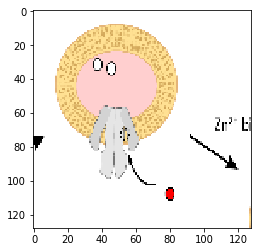

In [3]:
plt.imshow(image)
plt.show()

### Convolution

**Note: kernels must be manually initialized when the layer is not part of a network. In a properly connected CNN this is done automatically**


In [4]:
conv = Conv2D(no_of_kernels=1,color_channels=3,kernel_size=3,activation='ReLU')
conv.initialize_weights()

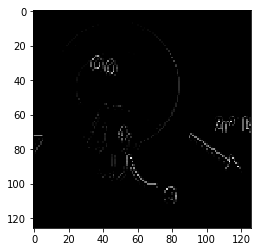

In [5]:
convolved = conv.feed_forward(image)
plt.imshow(convolved[:,:,0],cmap='gray')
plt.show()

**Multiple kernels**

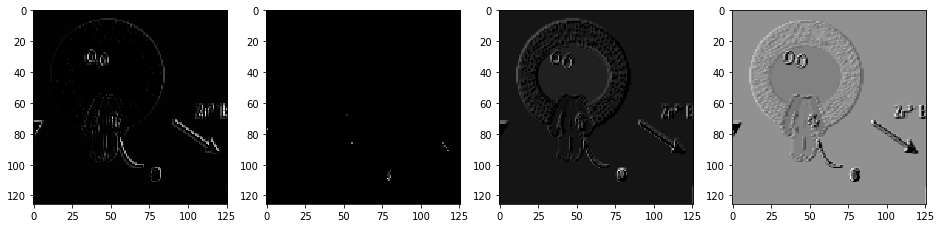

In [12]:
n = 4
conv = Conv2D(no_of_kernels=n,color_channels=3)
conv.initialize_weights()
convolved = conv.feed_forward(image)

fig, axes = plt.subplots(figsize=(16,12),ncols=n)
for i in range(n):
    axes[i].imshow(convolved[:,:,i],cmap='gray')
plt.show()

**Channels** <br>
The input depth - 1 for B&W, 3 for RGB and k kernels if the convolution layer follows another convolution layer

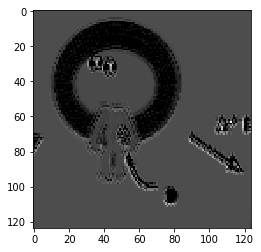

In [14]:
n = 8
conv1 = Conv2D(no_of_kernels=n,color_channels=3)
conv2 = Conv2D(1,color_channels=n,previous_layer=conv1)
conv2.initialize_weights()
convolved = conv1.feed_forward(image)

plt.imshow(convolved[:,:,0],cmap='gray')
plt.show()

**Kernel size**

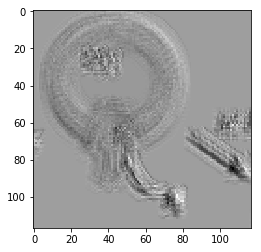

In [16]:
conv = Conv2D(no_of_kernels=1,color_channels=3,kernel_size=12)
conv.initialize_weights()
convolved = conv.feed_forward(image)

plt.imshow(convolved[:,:,0],cmap='gray')
plt.show()

**Activation function** is ReLU by default, but other functions can be specified by name (sigmoid, softmax) or provided as objects

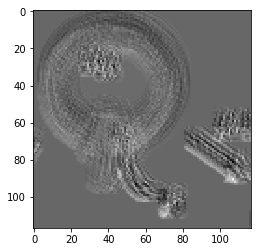

In [17]:
conv = Conv2D(no_of_kernels=1,color_channels=3,kernel_size=12,activation='sigmoid')
conv.initialize_weights()
convolved = conv.feed_forward(image)

plt.imshow(convolved[:,:,0],cmap='gray')
plt.show()

### Max Pooling

In [18]:
pool = MaxPool(2)

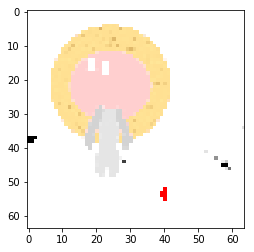

In [19]:
pooled = pool.feed_forward(image)

plt.imshow(pooled)
plt.show()

**Pooling size**

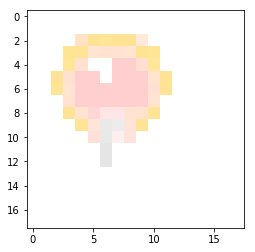

In [20]:
pool = MaxPool(7)
pooled = pool.feed_forward(image)

plt.imshow(pooled)
plt.show()

### Partial network

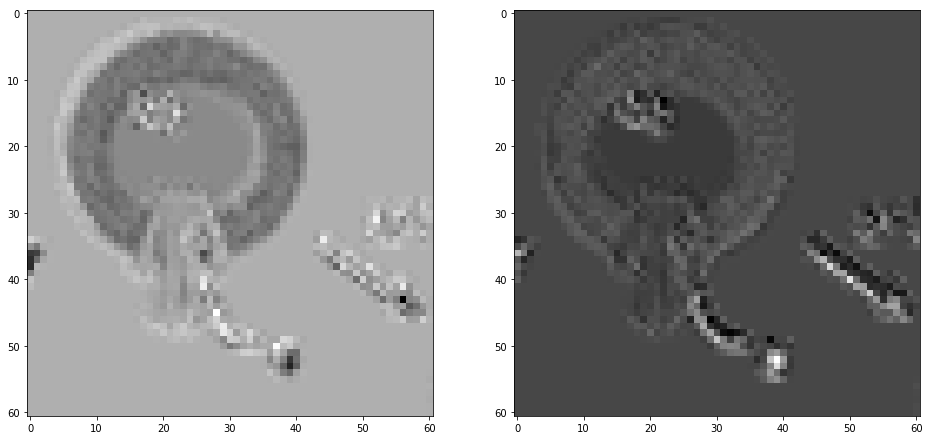

In [21]:
n1 = 8
n2 = 2

conv1 = Conv2D(no_of_kernels=n1,color_channels=3,activation='ReLU')
pool1 = MaxPool(pool_size=2,previous_layer=conv1)
conv2 = Conv2D(n2,color_channels=n1,previous_layer=pool1,activation='sigmoid')
conv2.initialize_weights()
convolved = conv1.feed_forward(image)

fig, axes = plt.subplots(figsize=(16,12),ncols=n2)
for i in range(n2):
    axes[i].imshow(convolved[:,:,i],cmap='gray')
plt.show()